In [2]:
import pandas as pd
import numpy as np


In [78]:
import matplotlib.pyplot as plt
import seaborn as sns

In [79]:
path = "play_tennis.csv"
df = pd.read_csv(path)
df.drop(columns=['day'], inplace=True)

In [101]:
df.head(4)

outlook  temp humidity    wind play
0     Sunny   Hot     High    Weak   No
1     Sunny   Hot     High  Strong   No
2  Overcast   Hot     High    Weak  Yes
3      Rain  Mild     High    Weak  Yes

In [126]:
# len(df)

# Visualization

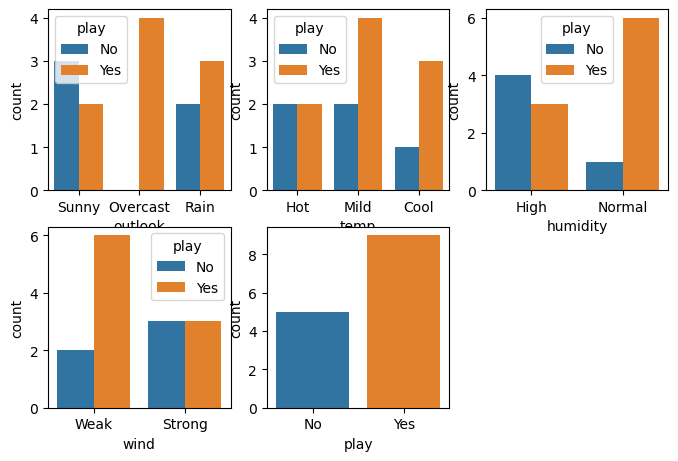

In [106]:
plt.figure(figsize=(8, 8))
for i in range(len(df.columns)):
    plt.subplot(3, 3, i + 1)
    col = df.columns[i]
    sns.countplot(data=df, x=col, hue='play')

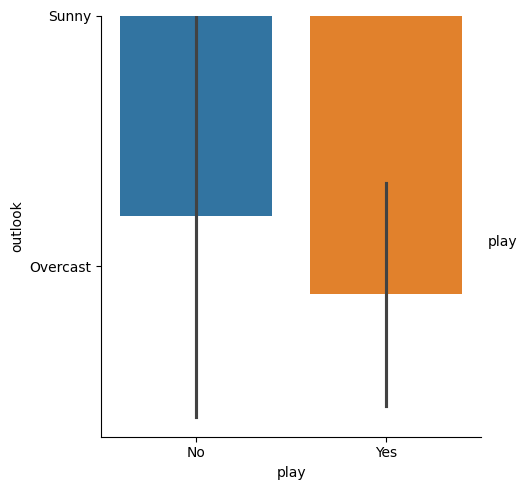

In [120]:
# sns.catplot(data=df, x='outlook', y='play', hue='play')
# sns.catplot(data=df, x='outlook', y='play', hue='play', kind='box')\
sns.catplot(data=df, x='play', y='outlook', hue='play', kind='bar')

In [82]:
X = df.drop('play', axis=1)
y = df.play

In [83]:
cols = X.columns
cols

Index(['outlook', 'temp', 'humidity', 'wind'], dtype='object')

In [84]:
from sklearn.preprocessing import LabelEncoder

def thisLabelEncode(data,columns):
    for i in columns:
        lb = LabelEncoder().fit_transform(data[i])
        data[i+'_'] = lb

In [85]:
thisLabelEncode(X, cols)

In [86]:
y.values

array(['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes',
       'Yes', 'Yes', 'Yes', 'No'], dtype=object)

In [87]:
encoder = LabelEncoder()
y_labeled = encoder.fit_transform(y)
y_labeled

array([0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0])

In [88]:
for i, label in enumerate(y_labeled):
    print(label, y.values[i])

0 No
0 No
1 Yes
1 Yes
1 Yes
0 No
1 Yes
0 No
1 Yes
1 Yes
1 Yes
1 Yes
1 Yes
0 No


In [89]:
X

outlook  temp humidity    wind  outlook_  temp_  humidity_  wind_
0      Sunny   Hot     High    Weak         2      1          0      1
1      Sunny   Hot     High  Strong         2      1          0      0
2   Overcast   Hot     High    Weak         0      1          0      1
3       Rain  Mild     High    Weak         1      2          0      1
4       Rain  Cool   Normal    Weak         1      0          1      1
5       Rain  Cool   Normal  Strong         1      0          1      0
6   Overcast  Cool   Normal  Strong         0      0          1      0
7      Sunny  Mild     High    Weak         2      2          0      1
8      Sunny  Cool   Normal    Weak         2      0          1      1
9       Rain  Mild   Normal    Weak         1      2          1      1
10     Sunny  Mild   Normal  Strong         2      2          1      0
11  Overcast  Mild     High  Strong         0      2          0      0
12  Overcast   Hot   Normal    Weak         0      1          1      1
13      Rain  Mild     High  Strong         1      2          0      0

In [91]:
X1 = X.drop(columns=cols)
X1

outlook_  temp_  humidity_  wind_
0          2      1          0      1
1          2      1          0      0
2          0      1          0      1
3          1      2          0      1
4          1      0          1      1
5          1      0          1      0
6          0      0          1      0
7          2      2          0      1
8          2      0          1      1
9          1      2          1      1
10         2      2          1      0
11         0      2          0      0
12         0      1          1      1
13         1      2          0      0

In [107]:
# sns.pairplot(X1)

In [111]:
X1.corr()

outlook_     temp_     humidity_         wind_
outlook_   1.000000  0.092036 -8.944272e-02  7.745967e-02
temp_      0.092036  1.000000 -5.144958e-01 -2.475369e-02
humidity_ -0.089443 -0.514496  1.000000e+00 -6.409876e-17
wind_      0.077460 -0.024754 -6.409876e-17  1.000000e+00

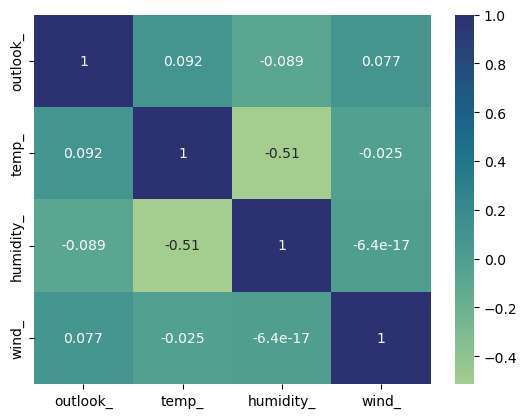

In [115]:
sns.heatmap(X1.corr(), annot=True, cmap='crest')
plt.show()

In [94]:
X.head()

outlook  temp humidity    wind  outlook_  temp_  humidity_  wind_
0     Sunny   Hot     High    Weak         2      1          0      1
1     Sunny   Hot     High  Strong         2      1          0      0
2  Overcast   Hot     High    Weak         0      1          0      1
3      Rain  Mild     High    Weak         1      2          0      1
4      Rain  Cool   Normal    Weak         1      0          1      1

In [100]:
# sns.countplot(x=X.outlook, y=y)
# plt.boxplot(x=X.outlook)

In [122]:
# plt.plot(x=X['outlook'].values, y=)

# Modeling Use : Navie Bayes (Categorical) 

เพราะว่าเป็นโมเดลที่ดีสำหรับข้อมูลเยอะๆจะแม่นจำ

In [43]:
from sklearn.naive_bayes import CategoricalNB
model = CategoricalNB()
model.fit(X1, y_labeled)

CategoricalNB()

In [44]:
model.feature_log_prob_

[array([[-2.07944154, -0.98082925, -0.69314718],
        [-0.87546874, -1.09861229, -1.38629436]]),
 array([[-1.38629436, -0.98082925, -0.98082925],
        [-1.09861229, -1.38629436, -0.87546874]]),
 array([[-0.33647224, -1.25276297],
        [-1.01160091, -0.45198512]]),
 array([[-0.55961579, -0.84729786],
        [-1.01160091, -0.45198512]])]

In [45]:
model.category_count_

[array([[0., 2., 3.],
        [4., 3., 2.]]),
 array([[1., 2., 2.],
        [3., 2., 4.]]),
 array([[4., 1.],
        [3., 6.]]),
 array([[3., 2.],
        [3., 6.]])]

In [46]:
model.feature_names_in_

array(['outlook_', 'temp_', 'humidity_', 'wind_'], dtype=object)

In [47]:
# X.to_numpy()
# np.unique(X.to_numpy))
# X.drop_duplicates()

In [48]:
X.outlook.unique()

array(['Sunny', 'Overcast', 'Rain'], dtype=object)

In [49]:
X.outlook_.unique()

array([2, 0, 1])

In [50]:
for col in X.columns[:4]:
    
    print(X[col].unique())
    print(X1[col + "_"].unique())
    print()
    # print(col)

['Sunny' 'Overcast' 'Rain']
[2 0 1]

['Hot' 'Mild' 'Cool']
[1 2 0]

['High' 'Normal']
[0 1]

['Weak' 'Strong']
[1 0]



In [51]:
ol_cols = ['outlook', 'outlook_']
X[ol_cols].drop_duplicates()

outlook  outlook_
0     Sunny         2
2  Overcast         0
3      Rain         1

In [52]:
cols

Index(['outlook', 'temp', 'humidity', 'wind'], dtype='object')

In [53]:
for col in cols:
    pair_cols = [col, col + "_"]
    print(X[pair_cols].drop_duplicates().to_numpy())
    # X[pair_cols].drop_duplicates()

[['Sunny' 2]
 ['Overcast' 0]
 ['Rain' 1]]
[['Hot' 1]
 ['Mild' 2]
 ['Cool' 0]]
[['High' 0]
 ['Normal' 1]]
[['Weak' 1]
 ['Strong' 0]]


In [54]:

ol_cols = ['outlook', 'outlook_']
X[ol_cols].drop_duplicates()

outlook  outlook_
0     Sunny         2
2  Overcast         0
3      Rain         1

#### example outlook Temp humidity windy play
1. sunny cool normal TRUE ?
2. rainy mild normal FALSE ?

In [55]:
y_to_pred = np.array([
    [2, 0, 1, 1],
    [1, 2, 1, 0]
])

In [58]:
model.predict_proba(y_to_pred)

/Users/rio/miniconda3/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but CategoricalNB was fitted with feature names
  warnings.warn(


array([[0.20126414, 0.79873586],
       [0.28411166, 0.71588834]])

In [59]:
model.predict(y_to_pred)

/Users/rio/miniconda3/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but CategoricalNB was fitted with feature names
  warnings.warn(


array([1, 1])

In [60]:
model.predict_log_proba(y_to_pred)

/Users/rio/miniconda3/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but CategoricalNB was fitted with feature names
  warnings.warn(


array([[-1.60313711, -0.22472497],
       [-1.25838794, -0.33423108]])

In [61]:
encoder.classes_

array(['No', 'Yes'], dtype=object)

In [62]:
encoder.get_params()

{}

In [63]:
model.predict_proba(y_to_pred)

/Users/rio/miniconda3/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but CategoricalNB was fitted with feature names
  warnings.warn(


array([[0.20126414, 0.79873586],
       [0.28411166, 0.71588834]])

In [123]:
y_new_pred_with_labeled = model.predict(y_to_pred)

for i, result in enumerate(y_new_pred_with_labeled, 1):
    print("With all of Factors %d => %s" %(i, encoder.classes_[i-1] + " Play"))

With all of Factors 1 => No Play
With all of Factors 2 => Yes Play


/Users/rio/miniconda3/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but CategoricalNB was fitted with feature names
  warnings.warn(


In [124]:
from sklearn.metrics import accuracy_score

accuracy_score()

TypeError: missing a required argument: 'y_true'